In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [3]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

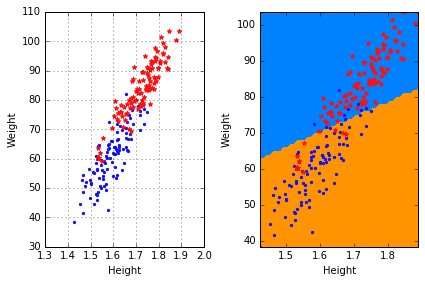

In [9]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):   
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    loss, w = least_squares(y,tx)
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [4]:
def sigmoid(t):
    """apply sigmoid function on t."""
    return np.exp(t)/(1+np.exp(t))

In [5]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    return (np.log(1+np.exp(tx.dot(w))) - np.multiply(y, tx.dot(w))).sum()

In [6]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss function."""
    return np.transpose(tx).dot(sigmoid(tx.dot(w))-y)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [7]:
def learning_by_gradient_descent(y, tx, w, alpha):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """  
    gradient = calculate_gradient(y, tx, w)
    loss = calculate_loss(y, tx, w)
    w_updated = w - alpha * gradient
    
    return loss, w_updated

Demo!

Current iteration=0, the loss=138.62943611198904
Current iteration=1000, the loss=43.492582752039944
Current iteration=2000, the loss=41.55453651737652
Current iteration=3000, the loss=41.10170781312696
Current iteration=4000, the loss=40.96605044352832
Current iteration=5000, the loss=40.92056155503627
Current iteration=6000, the loss=40.904380183565806
Current iteration=7000, the loss=40.89842938170658
Current iteration=8000, the loss=40.89619782090303
Current iteration=9000, the loss=40.89535112699075
Current iteration=10000, the loss=40.89502757990701
Current iteration=11000, the loss=40.894903401454926
Current iteration=12000, the loss=40.89485561276308
Current iteration=13000, the loss=40.89483719114219
Threshold reached ! Stop the descent !
The loss=40.894836099899095


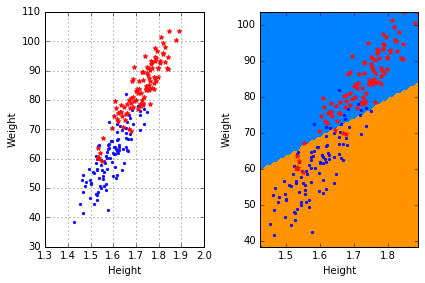

In [11]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 100000
    threshold = 1e-8
    alpha = 0.001
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, alpha)
        # log info
        if iter % 1000 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
    
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            print("Threshold reached ! Stop the descent !")
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [207]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    sigmoid_val = sigmoid(tx.dot(w))
    s = np.diag(np.squeeze(np.multiply(sigmoid_val, 1-sigmoid_val)))
    hessian = np.transpose(tx).dot(s).dot(tx)
    return hessian

In [147]:
a = np.array([[1],[2],[3],[4],[5],[6]])
b = np.squeeze(a)
print(b)
c = np.diag(b)
print(c)

[1 2 3 4 5 6]
[[1 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 4 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 6]]


Write a function below to return loss, gradient, and hessian.

In [54]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    return loss, gradient, hessian

### Using Newton method
Use Newton method for logistic regression.

In [200]:
def learning_by_newton_method(y, tx, w, alpha):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    loss, gradient, hessian = logistic_regression(y, tx, w)
    
    w_update = w - alpha*np.linalg.inv(hessian).dot(gradient)
    
    return loss, w_update

demo

Current iteration=0, the loss=138.62943611198904
Current iteration=500, the loss=40.964382792764695
Current iteration=1000, the loss=40.894828949093004
The loss=40.89482608530334


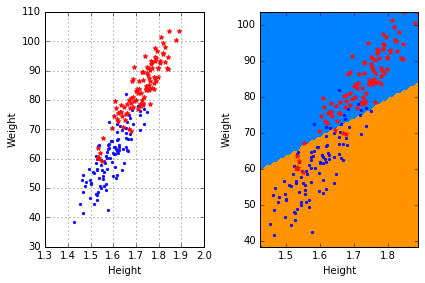

In [230]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 10000
    alpha = 0.01
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, alpha)
    
        # log info
        if iter % 500 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [ ]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w) + 2*lambda_*np.sqrt(np.power(w,2))
    
    d = np.zeros((w.shape[0],w.shape[0]))
    np.fill_diagonal(d,2*lambda_)
    hessian = calculate_hessian(y, tx, w) + d

    return loss, gradient, hessian
    

In [248]:
a = np.zeros((2,2))
np.fill_diagonal(a,5)
print(a)

[[ 5.  0.]
 [ 0.  5.]]


In [ ]:
def learning_by_penalized_gradient(y, tx, w, alpha, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and hessian: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    raise NotImplementedError
    return loss, w

In [ ]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    alpha = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, alpha, lambda_)
        # log info
        if iter % 500 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)